# Frozen Lake Q-Learning Comparison Analysis
[github](https://github.com/vtanevva/frozen_lake): [https://github.com/vtanevva/frozen_lake](https://github.com/vtanevva/frozen_lake)

This notebook presents a comprehensive comparison of Q-Learning configurations on the Frozen Lake 8x8 environment. The goal is to understand how different environment settings and algorithm parameters affect the learning process and final policy quality. The following key aspects are reviewed:

1. **Environment stochasticity** (slippery vs non-slippery)
2. **Reward shaping** through hole penalties
3. **Exploration strategies** (epsilon-greedy vs Boltzmann)
4. **Temperature parameter tuning** for Boltzmann exploration
5. **Hyperparameter analysis** (learning rate and discount factor)
6. **Boltzmann exploration in non-slippery environment** (proper evaluation setting)
   
For each comparison, both the learning curves (showing training progress with moving averages for clearer visualization) and the final Q-tables (showing learned policies and value estimates) are visualized. All learning curves use overlayed plots with moving averages to handle noisy reward signals and enable clearer comparison between different configurations.

## 1. Slippery vs Non-Slippery Environment Comparison

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#### Learning Curves Comparison with Moving Averages

The following plots show learning curves with moving averages (window=100) to smooth out noise and enable clearer comparison. All curves are overlayed on the same plot for direct comparison.

In [15]:
# Helper functions for plotting overlayed learning curves with moving averages
def moving_average(data, window=100):
    """Calculate moving average."""
    return np.convolve(data, np.ones(window)/window, mode='valid')

def plot_overlayed_curves(data_dict, title, ylabel='Average Reward per Episode (Moving Average)', window=100):
    """
    Plot overlayed learning curves with moving averages.
    
    Parameters:
    - data_dict: dict with labels as keys and reward arrays as values
    - title: plot title
    - ylabel: y-axis label
    - window: moving average window size
    """
    plt.figure(figsize=(14, 8))
    
    for label, rewards in data_dict.items():
        # Calculate moving average
        ma_rewards = moving_average(rewards, window=window)
        # Plot with offset to align with original episode numbers
        episodes = np.arange(len(ma_rewards)) + window - 1
        plt.plot(episodes, ma_rewards, label=label, linewidth=2, alpha=0.8)
    
    plt.xlabel('Episode', fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=11, framealpha=0.9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Note: These functions will be used throughout the notebook for consistent visualization

In [17]:
try:
    pass
except:
    pass

This fist experiment was done to examine how the model behaves under different environmental conditions. In the non-slippery setting, the agent quickly converges to an optimal policy, as consistent feedback allows for stable and predictable learning. In contrast, the slippery environment introduces randomness, which slows convergence and causes greater fluctuations in performance. This instability mirrors real-world uncertainty, where outcomes are rarely deterministic. 

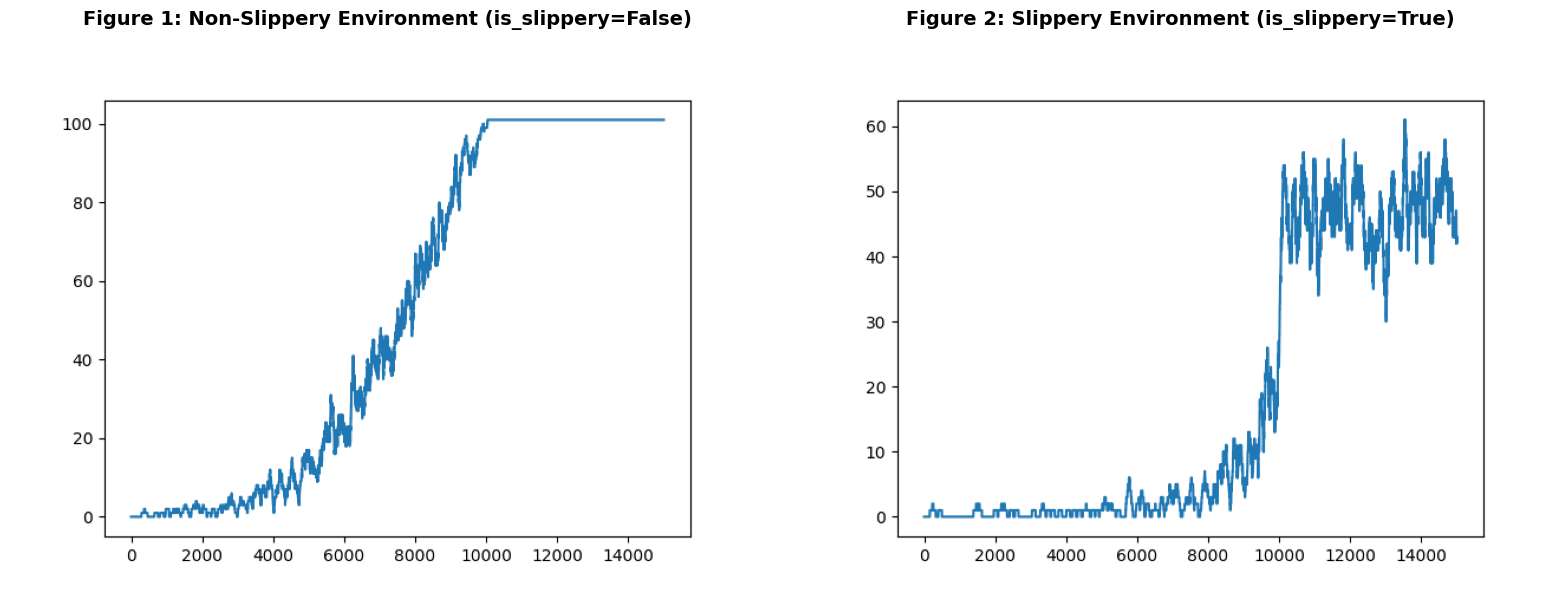

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

img1 = mpimg.imread('comparison/is_slippery/False/frozen_lake_8x8.png')
axes[0].imshow(img1)
axes[0].set_title('Figure 1: Non-Slippery Environment (is_slippery=False)', fontsize=14, fontweight='bold')
axes[0].axis('off')

img2 = mpimg.imread('comparison/is_slippery/True/True.png')
axes[1].imshow(img2)
axes[1].set_title('Figure 2: Slippery Environment (is_slippery=True)', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

While the non-slippery environment yields faster and smoother learning, is_slippery=True is ultimately more valuable because it offers a more realistic and accurate representation of real-world conditions, enabling the agent to develop more robust and generalizable learning behavior.

#### Q-Table Visualizations Comparison
To understand how well the agent performed and what it learned, the Q-tables are shown as heatmaps. These heatmaps display how valuable each state and action is for the agent. In the non-slippery environment, the Q-values create a clear pattern that leads toward the goal, showing confident decisions and steady improvement. The agent learns a direct and reliable path because the environment behaves in a predictable way. In the slippery environment, the Q-values vary more and are generally lower, since the random movement makes it harder to avoid penalties and reach the goal. Still, the agent manages to find a partly effective strategy, showing that it can adapt and learn even when the environment is uncertain.

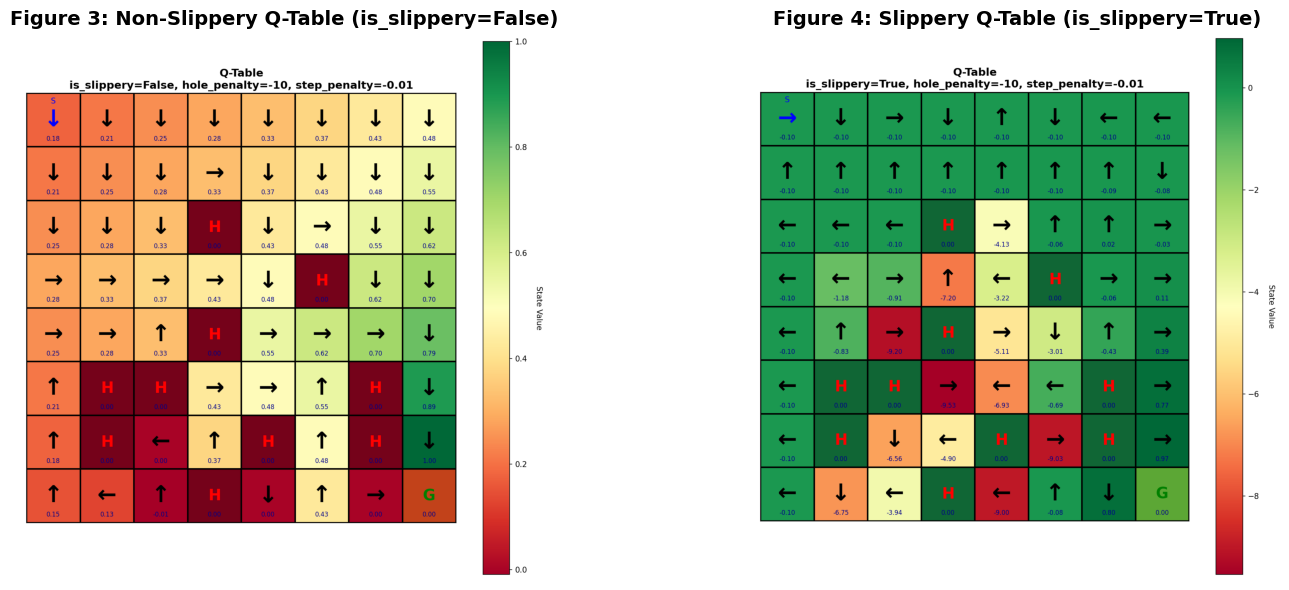

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

img1 = mpimg.imread('comparison/is_slippery/False/qtable_visualization.png')
axes[0].imshow(img1)
axes[0].set_title('Figure 3: Non-Slippery Q-Table (is_slippery=False)', fontsize=14, fontweight='bold')
axes[0].axis('off')

img2 = mpimg.imread('comparison/is_slippery/True/qtable_visualization.png')
axes[1].imshow(img2)
axes[1].set_title('Figure 4: Slippery Q-Table (is_slippery=True)', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 2. Hole Penalty Comparison

### Learning Curves Comparison
On Frozen Lake (Frozen Lake - Gymnasium Documentation (farama.org)Links to an external site.) , shows that adding a negative reward for each move and a negative reward for each time the agent falls in the hole makes learning faster. 

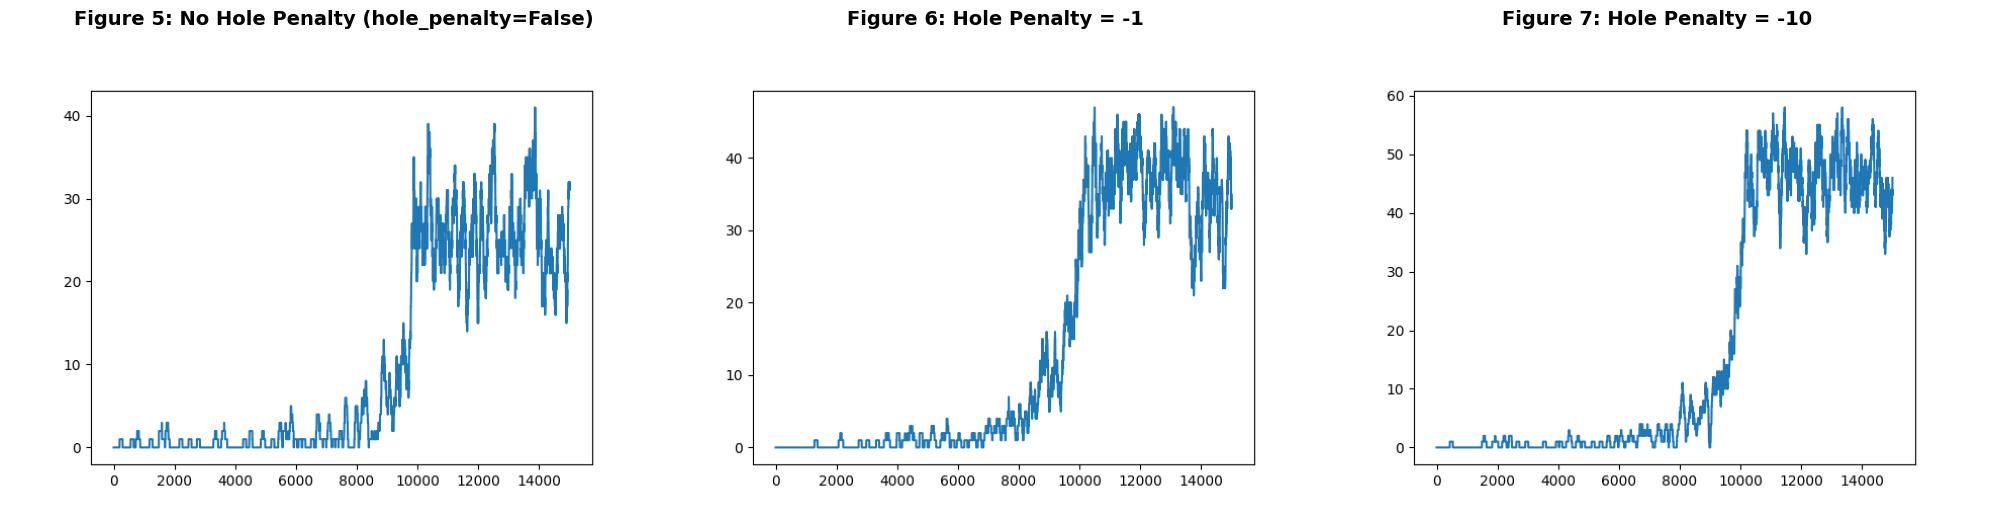

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

img1 = mpimg.imread('comparison/hole_penalty/False/frozen_lake_8x8.png')
axes[0].imshow(img1)
axes[0].set_title('Figure 5: No Hole Penalty (hole_penalty=False)', fontsize=14, fontweight='bold')
axes[0].axis('off')

img2 = mpimg.imread('comparison/hole_penalty/True=-1/frozen_lake_8x8.png')
axes[1].imshow(img2)
axes[1].set_title('Figure 6: Hole Penalty = -1', fontsize=14, fontweight='bold')
axes[1].axis('off')

img3 = mpimg.imread('comparison/hole_penalty/True=-10/frozen_lake_8x8.png')
axes[2].imshow(img3)
axes[2].set_title('Figure 7: Hole Penalty = -10', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

When no penalty is applied, the agent explores more freely but lacks strong motivation to avoid holes, resulting in slower learning and less consistent improvement. On the other hand, the moderate penalty (−1) encourages the agent to be more cautious, leading to steadier learning and faster convergence toward optimal behavior. With a high penalty (−10), the agent learns to avoid dangerous states early but also experiences higher variability in rewards as it balances exploration with safety. Overall, the results demonstrate that penalizing negative outcomes improves learning efficiency, though excessive punishment may reduce exploration flexibility and increase training instability.

### Q-Table Visualizations Comparison


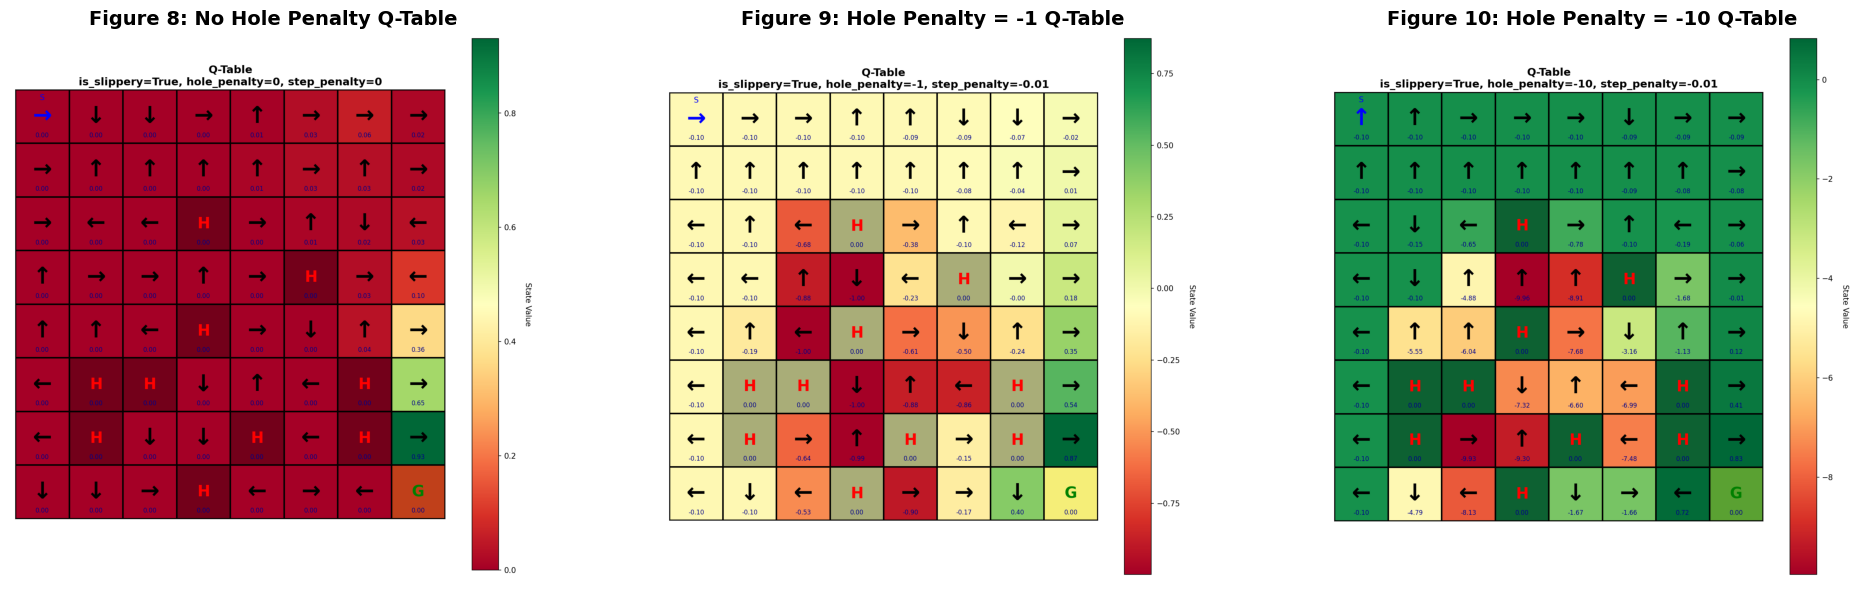

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

img1 = mpimg.imread('comparison/hole_penalty/False/qtable_visualization.png')
axes[0].imshow(img1)
axes[0].set_title('Figure 8: No Hole Penalty Q-Table', fontsize=14, fontweight='bold')
axes[0].axis('off')

img2 = mpimg.imread('comparison/hole_penalty/True=-1/qtable_visualization.png')
axes[1].imshow(img2)
axes[1].set_title('Figure 9: Hole Penalty = -1 Q-Table', fontsize=14, fontweight='bold')
axes[1].axis('off')

img3 = mpimg.imread('comparison/hole_penalty/True=-10/qtable_visualization.png')
axes[2].imshow(img3)
axes[2].set_title('Figure 10: Hole Penalty = -10 Q-Table', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Without a penalty, the values of q-tables remain low and evenly distributed, indicating weak differentiation between safe and risky states. When a −1 penalty is introduced, the value map becomes more structured, showing that the agent starts prioritizing safer routes and penalizing dangerous transitions. Under a −10 penalty, the contrast becomes strongest - cells near holes show highly negative values, while the optimal path toward the goal is clearly reinforced, confirming that increasing the penalty intensifies risk avoidance, guiding the agent to develop a more cautious and goal-oriented strategy.

## 3. Exploration Strategy Comparison

The Boltzmann exploration results shown in this section were obtained from a slippery environment. As noted in the feedback, the slippery environment's inherent randomness makes it difficult to properly evaluate Boltzmann exploration because environmental noise causes Q-values to become more similar, increasing noise in the softmax (Boltzmann) distribution. 

For a proper evaluation of Boltzmann exploration that isolates its true behavior, please refer to *Section 6*, where experiments were conducted in a deterministic setting that allows clear interpretation of the exploration strategy's effects.

## 4. Hyperparameter Analysis: Learning Rate and Discount Factor

### 4.1 Learning Rate Analysis

**Hyperparameter Range and Justification:**
- Range tested: 0.1, 0.3, 0.5, 0.7, 0.9
- Justification:
  - Low values (0.1-0.3): Conservative updates, slower learning but more stable
  - Medium values (0.5-0.7): Balanced trade-off between stability and learning speed
  - High values (0.9): Aggressive updates, faster learning but potentially unstable
  - Values > 0.9 are typically avoided as they can cause Q-values to oscillate or diverge
  - The range covers the full spectrum from conservative to aggressive learning strategies

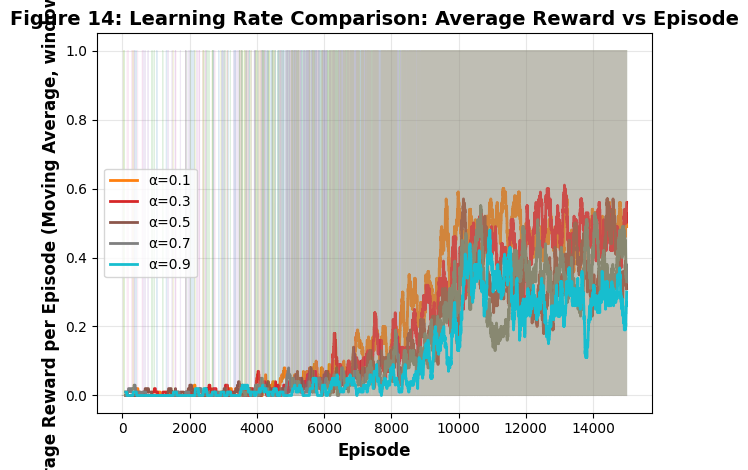

In [24]:
import pickle
import os

def load_rewards(directory):
    """Load rewards from pickle file."""
    with open(os.path.join(directory, 'rewards.pkl'), 'rb') as f:
        return pickle.load(f)

def moving_average(data, window=100):
    """Calculate moving average."""
    return np.convolve(data, np.ones(window)/window, mode='valid')

learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
lr_rewards = {}

for lr in learning_rates:
    try:
        dir_path = f'comparison/hyperparameters/learning_rate/lr_{lr}'
        rewards = load_rewards(dir_path)
        lr_rewards[lr] = rewards
    except FileNotFoundError:
        print(f"Results not found for learning_rate={lr}. Run run_hyperparameter_experiments.py first.")
        # Create dummy data for visualization structure
        lr_rewards[lr] = np.random.rand(15000) * 0.1  # Placeholder

window = 100

for lr in learning_rates:
    rewards = lr_rewards[lr]

    plt.plot(rewards, alpha=0.15, linewidth=0.8)

    ma_rewards = moving_average(rewards, window=window)
    episodes = np.arange(len(ma_rewards)) + window - 1
    plt.plot(episodes, ma_rewards, label=f'α={lr}', linewidth=2)

plt.xlabel('Episode', fontsize=12, fontweight='bold')
plt.ylabel('Average Reward per Episode (Moving Average, window=100)', fontsize=12, fontweight='bold')
plt.title('Learning Rate Comparison: Average Reward vs Episode', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis of Learning Rate Impact:**

1. Low Learning Rates (α = 0.1, 0.3):
   - Advantages: more stable learning, less sensitive to noisy rewards, smoother convergence
   - Disadvantages: slower learning, requires more episodes to converge
   - Use Case: when the environment is noisy or when Q-values need to be updated conservatively

2. Medium Learning Rates (α = 0.5, 0.7):
   - Advantages: good balance between learning speed and stability
   - Disadvantages: may still be sensitive to initial random experiences
   - Use Case: general purpose settings for most Q-learning problems

3. High Learning Rates (α = 0.9):
   - Advantages: fast initial learning, quick adaptation to new information
   - Disadvantages: can cause instability, Q-values may oscillate, sensitive to outliers
   - Use Case: when fast learning is critical and the environment is relatively stable

**Key Observations:**
- Higher learning rates lead to faster initial learning but may cause instability
- Lower learning rates provide smoother, more stable learning curves
- The optimal learning rate depends on the environment's noise level and the desired trade-off between speed and stability
- In stochastic environments like Frozen Lake, moderate learning rates (0.5-0.7) often provide the best balance

### 4.2 Discount Factor Analysis

**Hyperparameter Range and Justification:**
- Range tested: 0.5, 0.7, 0.9, 0.95, 0.99
- Justification:
  - Low values (0.5-0.7): Short-sighted, prioritizes immediate rewards, useful for problems with immediate feedback
  - Medium values (0.9): Standard choice, balances immediate and future rewards
  - High values (0.95-0.99): Long-sighted, values future rewards highly, important for problems requiring long-term planning
  - Values very close to 1 (0.99+) can cause slow convergence as the agent considers rewards far into the future
  - The range covers from myopic (short-term) to far-sighted (long-term) planning strategies

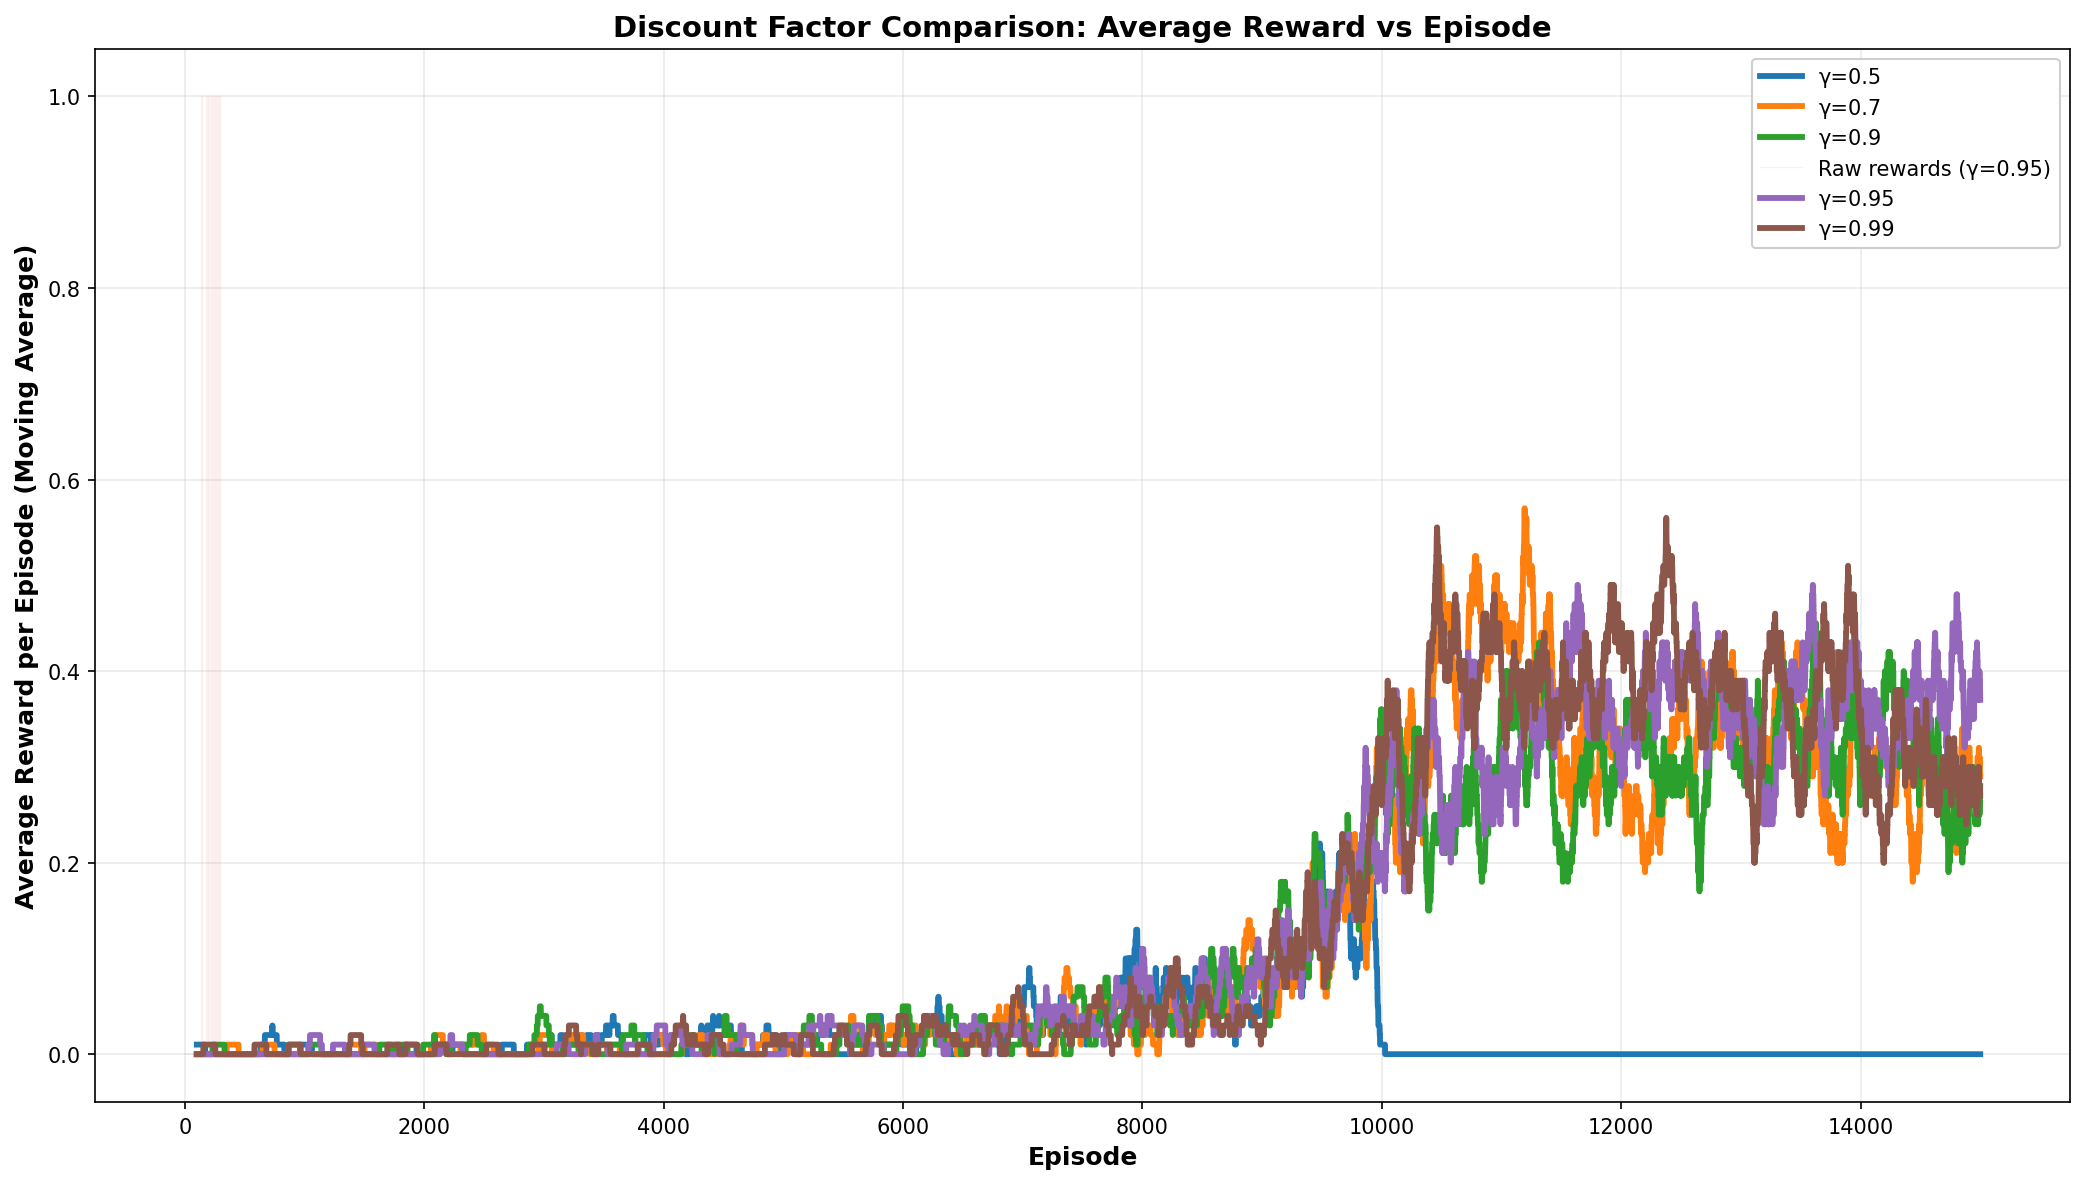

In [12]:
discount_factors = [0.5, 0.7, 0.9, 0.95, 0.99]
gamma_rewards = {}

for gamma in discount_factors:
    try:
        dir_path = f'comparison/hyperparameters/discount_factor/gamma_{gamma}'
        rewards = load_rewards(dir_path)
        gamma_rewards[gamma] = rewards
    except FileNotFoundError:
        print(f"Results not found for discount_factor={gamma}. Run run_hyperparameter_experiments.py first.")
        gamma_rewards[gamma] = np.random.rand(15000) * 0.1 

plt.figure(figsize=(14, 8), dpi=150)
window = 100
raw_step = 50
baseline_gamma = 0.95  # only show raw noise for one gamma

for gamma in discount_factors:
    rewards = gamma_rewards[gamma]

    if gamma == baseline_gamma:
        plt.plot(
            rewards[::raw_step],
            alpha=0.08,
            linewidth=0.6,
            label='Raw rewards (γ=0.95)'
        )

    ma_rewards = moving_average(rewards, window=window)
    episodes = np.arange(len(ma_rewards)) + window - 1
    plt.plot(
        episodes,
        ma_rewards,
        label=f'γ={gamma}',
        linewidth=2.8
    )

plt.xlabel('Episode', fontsize=12, fontweight='bold')
plt.ylabel('Average Reward per Episode (Moving Average)', fontsize=12, fontweight='bold')
plt.title('Figure 15: Discount Factor Comparison: Average Reward vs Episode', fontsize=14, fontweight='bold')
plt.legend(framealpha=0.95)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

**Analysis of Discount Factor Impact:**

1. Low Discount Factors (γ = 0.5, 0.7):
   - Behavior: agent focuses on immediate rewards, short-term planning
   - Advantages: faster convergence, less sensitive to distant future rewards
   - Disadvantages: may miss optimal long-term strategies, suboptimal for problems requiring planning
   - Use case: episodic tasks with immediate feedback or when long-term planning is not critical

2. Medium Discount Factors (γ = 0.9):
   - Behavior: balanced consideration of immediate and future rewards
   - Advantages: standard choice, works well for most problems
   - Disadvantages: may not be optimal for very long-horizon problems
   - Use case: general purpose setting, most Q-learning applications

3. High Discount Factors (γ = 0.95, 0.99):
   - Behavior: agent values future rewards highly, long-term planning
   - Advantages: better for long-horizon problems, encourages finding optimal long-term strategies
   - Disadvantages: Slower convergence, Q-values propagate more slowly, requires more training
   - Use case: Problems requiring long-term planning, when optimal paths may involve longer routes

**Key Observations:**
- Higher discount factors encourage the agent to plan further ahead
- In Frozen Lake, a high discount factor helps the agent learn to avoid holes even if it means taking a longer path
- Very high discount factors (0.99+) can slow learning significantly as the agent considers rewards far into the future
- The optimal discount factor depends on the problem's planning horizon and whether immediate or long-term rewards are more important

## 5. Boltzmann Exploration in Non-Slippery Environment

As noted in the feedback, the slippery environment introduces inherent randomness that makes it difficult to properly evaluate Boltzmann exploration. The environmental noise causes Q-values to become more similar, which increases noise in the softmax (Boltzmann) distribution. To properly study Boltzmann exploration, we conduct experiments in the non-slippery environment where the agent's action selection directly determines outcomes.

Key insight: In deterministic (non-slippery) environments, Boltzmann exploration's temperature parameter has a clearer, more interpretable effect on the exploration-exploitation trade-off.

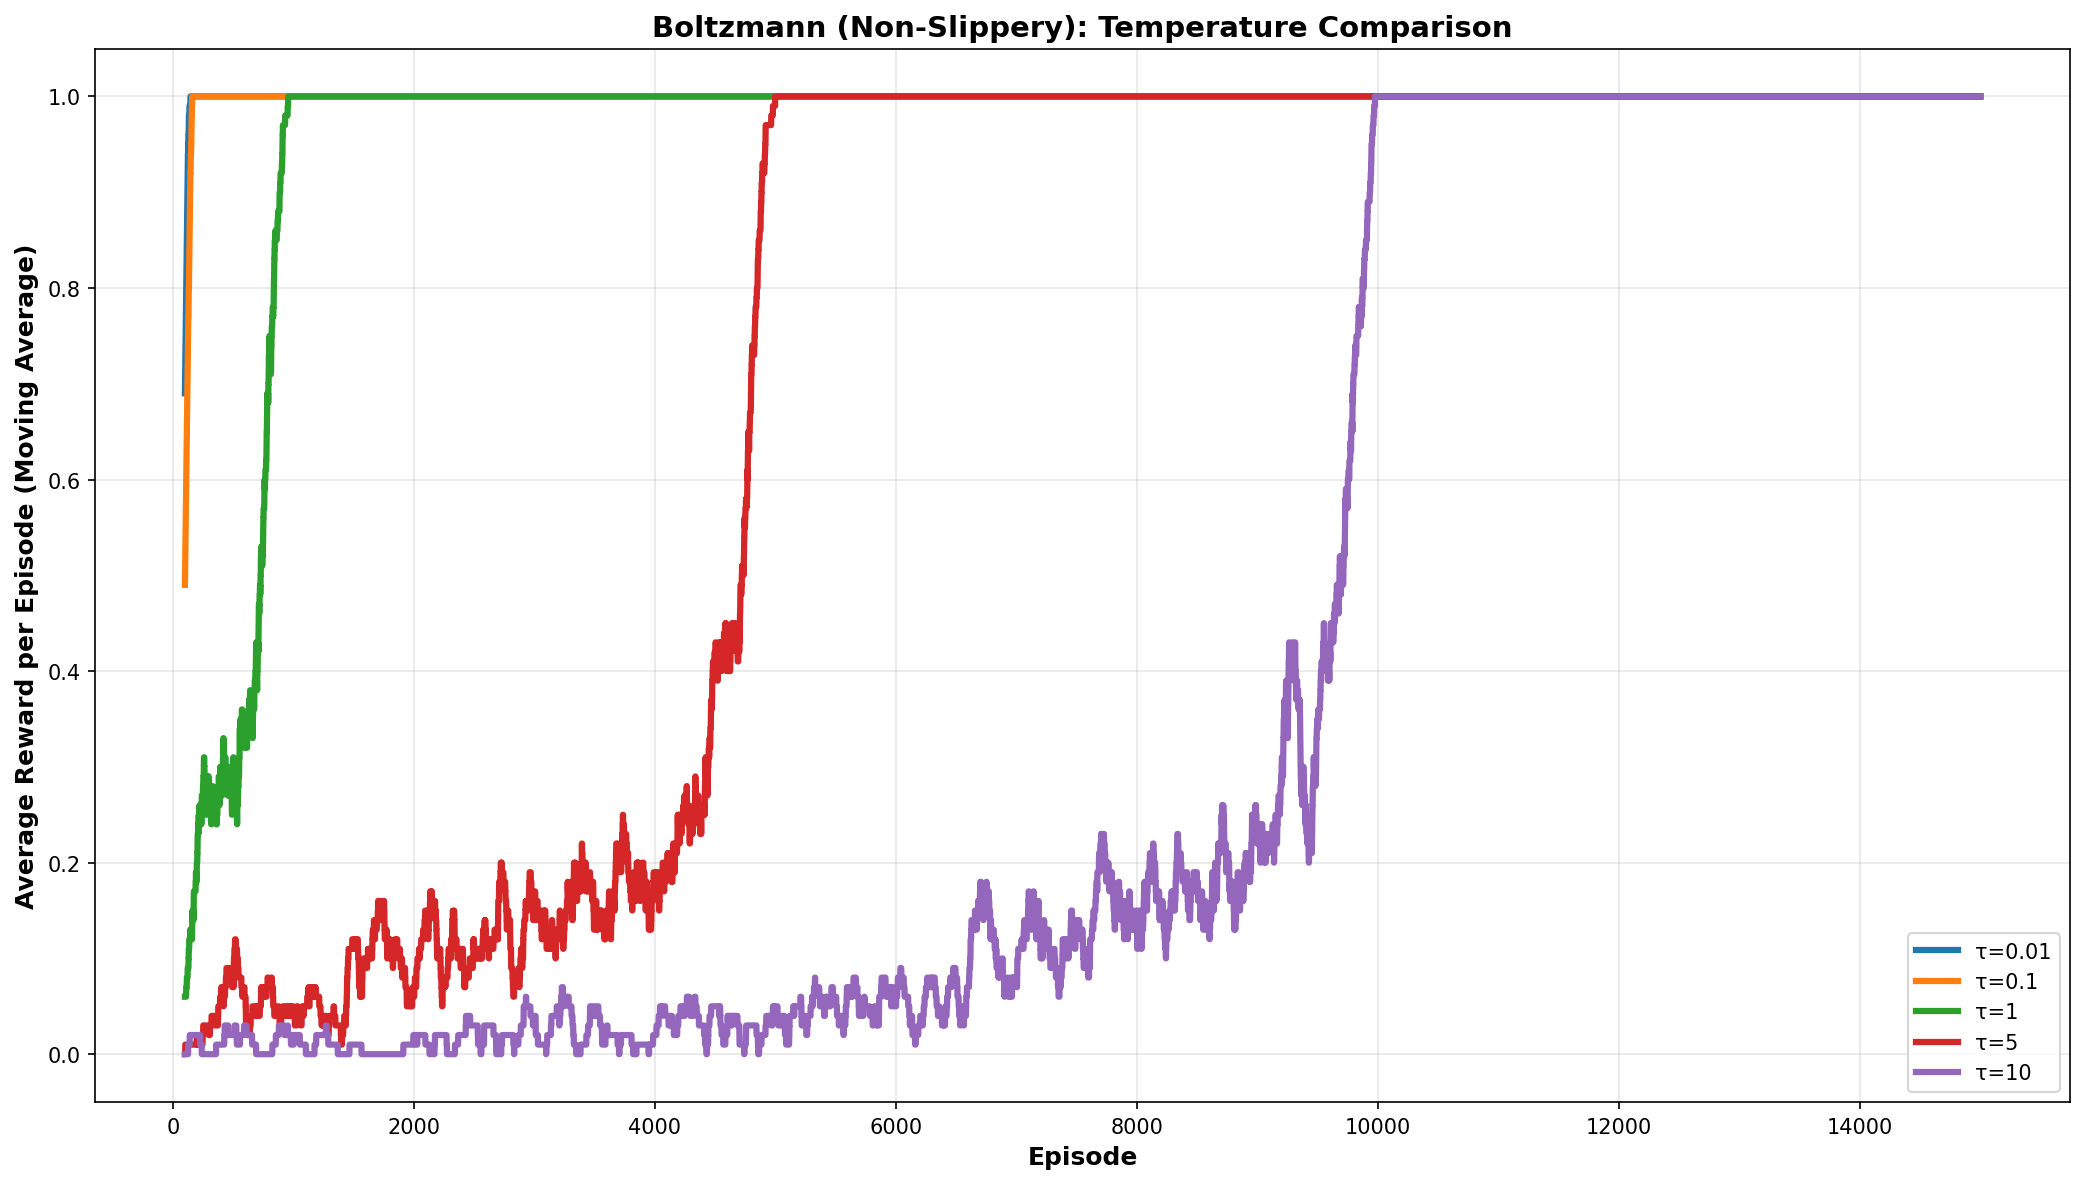

In [11]:
temperatures = [0.01, 0.1, 1.0, 5.0, 10.0]
boltzmann_ns_rewards = {}

for temp in temperatures:
    try:
        dir_path = f'comparison/hyperparameters/boltzmann_non_slippery/temp_{temp}'
        rewards = load_rewards(dir_path)
        boltzmann_ns_rewards[temp] = rewards
    except FileNotFoundError:
        print(f"Warning: Results not found for temperature={temp}. Run run_hyperparameter_experiments.py first.")
        boltzmann_ns_rewards[temp] = np.random.rand(15000) * 0.1  

plt.figure(figsize=(14, 8), dpi=150)
window = 100

for temp in temperatures:
    rewards = boltzmann_ns_rewards[temp]
    ma_rewards = moving_average(rewards, window=window)
    episodes = np.arange(len(ma_rewards)) + window - 1
    plt.plot(episodes, ma_rewards, label=f'τ={temp:g}', linewidth=3)

plt.xlabel('Episode', fontsize=12, fontweight='bold')
plt.ylabel('Average Reward per Episode (Moving Average)', fontsize=12, fontweight='bold')
plt.title('Figure 16: Boltzmann (Non-Slippery): Temperature Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis of Boltzmann Exploration in Non-Slippery Environment:**

1. Very Low Temperature (τ = 0.01):
   - Behavior: nearly deterministic, almost always selects the action with highest Q-value
   - Advantages: fast convergence to greedy policy, stable once Q-values are learned
   - Disadvantages: minimal exploration, may get stuck in suboptimal policies
   - Note: with proper annealing, this should converge to fully greedy (T→0), matching epsilon-greedy with ε→0

2. Low Temperature (τ = 0.1):
   - Behavior: mostly exploits but with some exploration of high-value actions
   - Advantages: good balance when Q-values are reasonably accurate
   - Disadvantages: may still miss optimal actions if initial Q-values are poor

3. Medium Temperature (τ = 1.0):
   - Behavior: balanced exploration based on Q-value differences
   - Advantages: natural exploration that respects action quality differences
   - Disadvantages: may explore too much if Q-values are similar

4. High Temperature (τ = 5.0, 10.0):
   - Behavior: nearly uniform exploration, similar to high epsilon in epsilon-greedy
   - Advantages: extensive exploration of all actions
   - Disadvantages: slow learning, inefficient use of learned information

**Key Insights:**
- In non-slippery environments, temperature has a clear, interpretable effect on exploration
- With temperature annealing (τ decreasing over time), the final temperature is crucial: it should be low enough (τ ≈ 0.01) to achieve stable, greedy behavior
- When the environment is already noisy (slippery), operating with high temperature adds unnecessary noise to the policy
- The optimal final temperature should make Boltzmann as stable as epsilon-greedy with ε=0 (fully greedy)
- Temperature annealing should ensure τ→0 for fully greedy final policy, matching the behavior of epsilon-greedy with ε→0

### Comparison: Epsilon-Greedy vs Boltzmann in Non-Slippery Environment

<Figure size 1400x800 with 0 Axes>

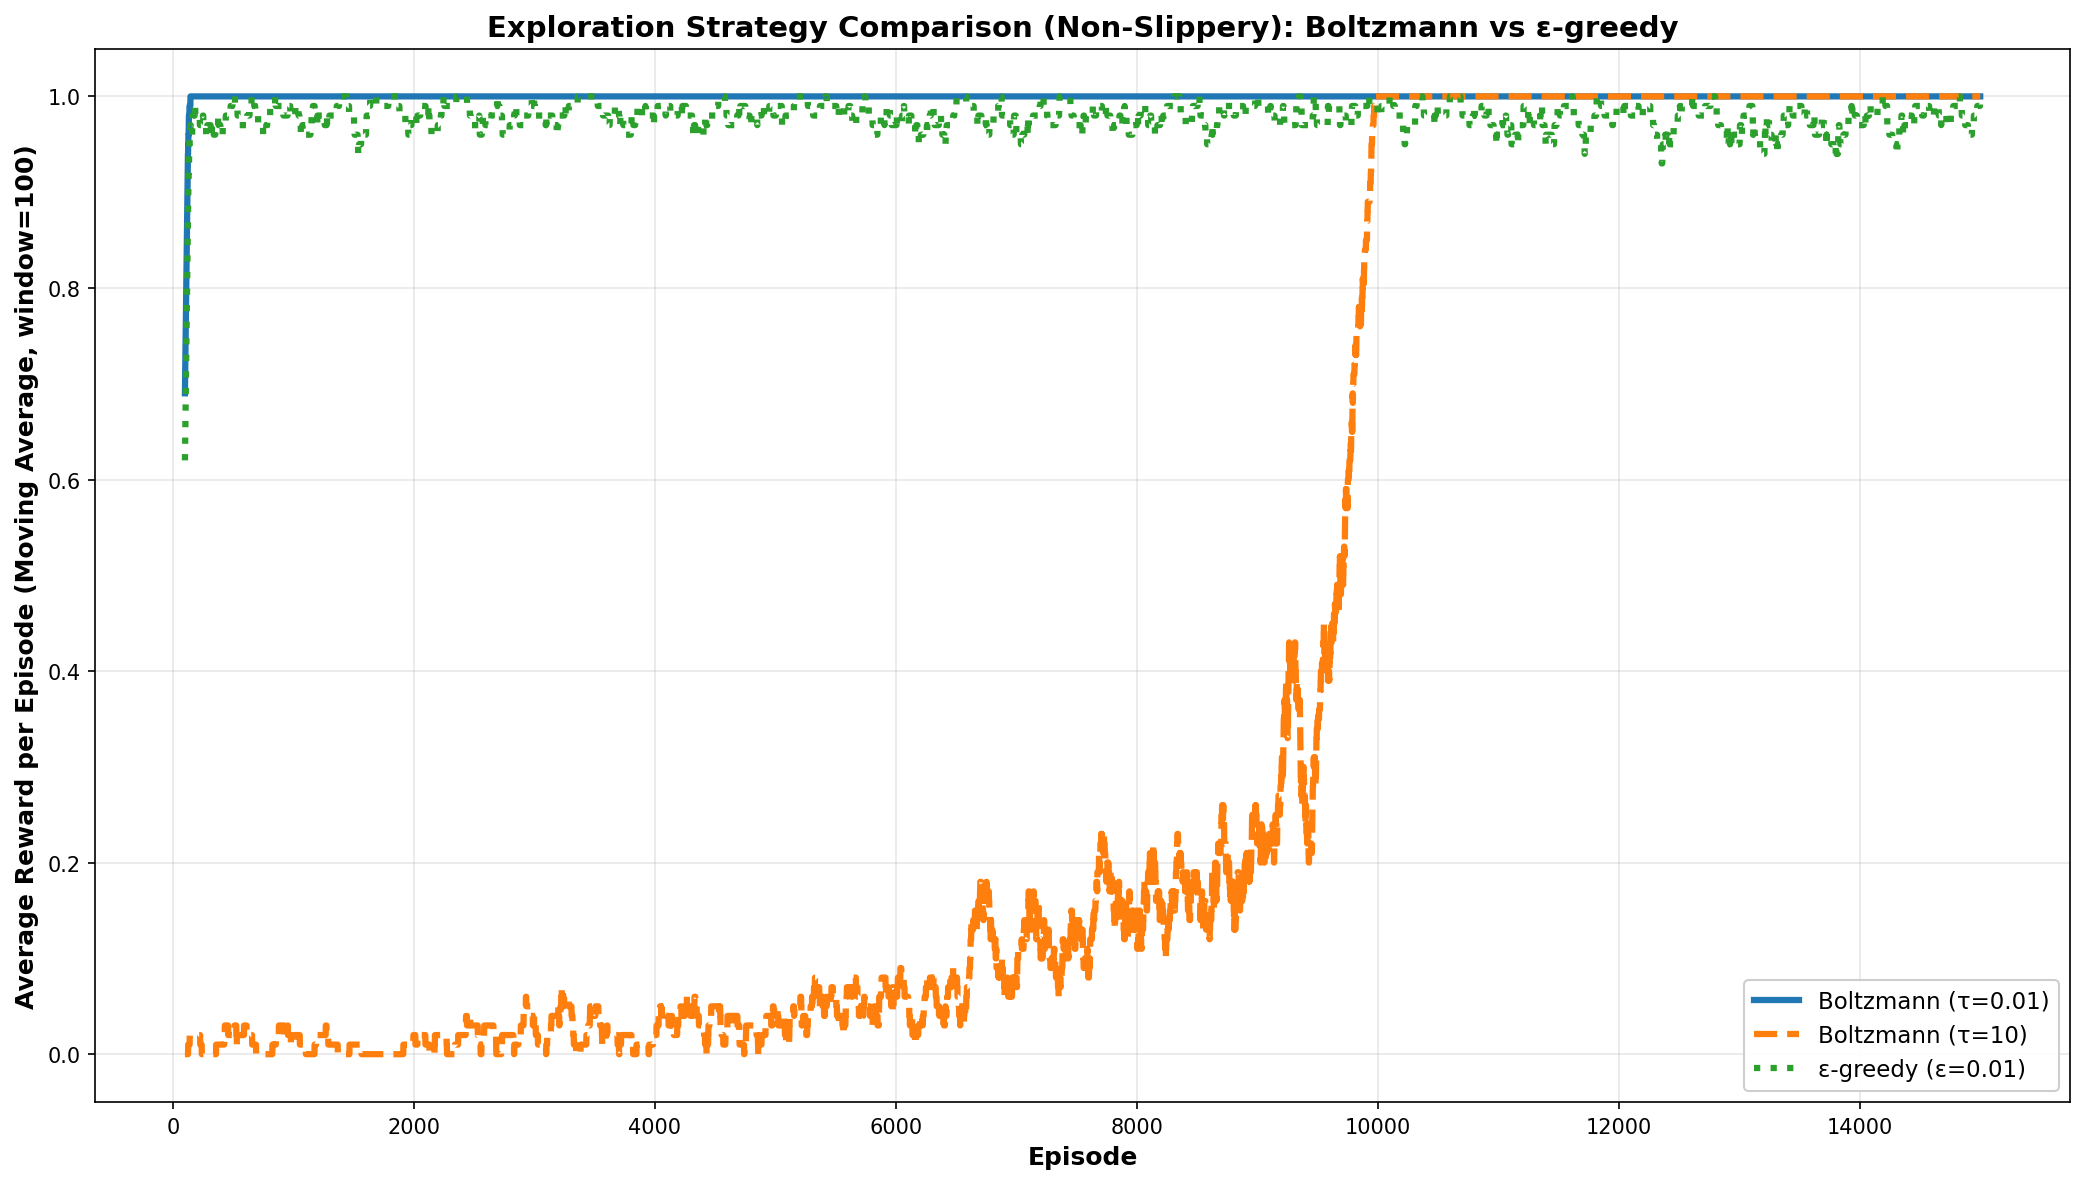

In [14]:
window = 100
plt.figure(figsize=(14, 8), dpi=150)

# Boltzmann: cold (near-greedy) 
temp_cold = 0.01
if temp_cold in boltzmann_ns_rewards:
    rewards = boltzmann_ns_rewards[temp_cold]
    ma = moving_average(rewards, window=window)
    ep = np.arange(len(ma)) + window - 1
    plt.plot(ep, ma, linewidth=3, label=f'Boltzmann (τ={temp_cold:g})')

# Boltzmann: hot (very exploratory)
temp_hot = 10.0
if temp_hot in boltzmann_ns_rewards:
    rewards = boltzmann_ns_rewards[temp_hot]
    ma = moving_average(rewards, window=window)
    ep = np.arange(len(ma)) + window - 1
    plt.plot(ep, ma, linewidth=3, linestyle='--', label=f'Boltzmann (τ={temp_hot:g})')

#  ε-greedy baseline (non-slippery) 
eps = 0.01
eps_dir = f'comparison/hyperparameters/epsilon_greedy_non_slippery/eps_{eps}'
try:
    eps_rewards = load_rewards(eps_dir)
    eps_ma = moving_average(eps_rewards, window=window)
    eps_ep = np.arange(len(eps_ma)) + window - 1
    plt.plot(eps_ep, eps_ma, linewidth=3, linestyle=':', label=f'ε-greedy (ε={eps})')
except FileNotFoundError:
    print(f"Warning: ε-greedy results not found at {eps_dir}. Run the ε-greedy non-slippery experiment to generate them.")

plt.xlabel('Episode', fontsize=12, fontweight='bold')
plt.ylabel('Average Reward per Episode (Moving Average, window=100)', fontsize=12, fontweight='bold')
plt.title('Figure 17: Exploration Strategy Comparison (Non-Slippery): Boltzmann vs ε-greedy', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11, framealpha=0.95)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Reflection and Summary

This comprehensive analysis of Q-Learning on the Frozen Lake environment has provided valuable insights into reinforcement learning algorithm design, hyperparameter tuning, and the interaction between exploration strategies and environmental characteristics.

#### 1. **Environment Characteristics Matter**
The most fundamental lesson is that environmental stochasticity fundamentally changes the learning dynamics. The slippery environment introduces inherent randomness that:
- Slows convergence and increases variance in learning curves
- Makes it difficult to evaluate exploration strategies (as seen with Boltzmann exploration)
- Requires more robust algorithms that can handle uncertainty
- Mirrors real-world conditions where outcomes are rarely deterministic

The non-slippery environment, while less realistic, provides a cleaner setting for understanding algorithm behavior and isolating the effects of different hyperparameters.

#### 2. **Reward Shaping is Powerful**
Reward shaping through hole penalties demonstrated how carefully designed reward signals can dramatically improve learning:
- Moderate penalties (-1) provide effective guidance without over-constraining exploration
- Excessive penalties (-10) can create instability and reduce exploration flexibility
- The right balance encourages the agent to learn safe, optimal paths while maintaining sufficient exploration

This highlights the importance of domain knowledge in designing effective reward functions.

#### 3. **Exploration Strategy Selection Requires Context**
The comparison between epsilon-greedy and Boltzmann exploration revealed that the choice of exploration strategy depends heavily on the environment:

- Epsilon-greedy is straightforward, interpretable, and works well across different environments. Its binary exploration-exploitation trade-off is easy to tune.

- Boltzmann exploration offers a more nuanced, probability-based approach that naturally respects action quality differences. However:
  - It requires careful temperature tuning
  - In noisy (slippery) environments, the environmental randomness compounds with the softmax randomness, making it harder to evaluate
  - Temperature annealing is crucial, and the final temperature must be low enough (τ→0) to achieve stable, greedy behavior
  - In deterministic environments, Boltzmann's behavior is clearer and more interpretable

Key insight: To properly evaluate Boltzmann exploration, experiments should be conducted in deterministic (non-slippery) environments where the exploration strategy's effects are not masked by environmental noise.

#### 4. **Hyperparameter Tuning is Critical**
The hyperparameter analysis revealed the importance of careful tuning:

Learning Rate (α):
The learning rate controls how quickly the agent updates its Q-values and therefore directly influences both the speed and stability of learning. Higher learning rates (e.g., 0.9) allow the agent to adapt rapidly to new information, but they may introduce instability and oscillations in the learning process, especially in stochastic environments. Lower learning rates (e.g., 0.1–0.3) result in more stable updates, although convergence tends to be slower. Consequently, the optimal learning rate depends on the level of environmental noise and the desired balance between learning speed and stability.

Discount Factor (γ):
The discount factor determines the agent’s planning horizon by controlling how future rewards are weighted relative to immediate rewards. Higher discount factors (0.95–0.99) encourage long-term planning by assigning greater importance to future outcomes, but they often result in slower convergence due to increased uncertainty. Lower discount factors (0.5–0.7) prioritize immediate rewards, leading to faster convergence at the cost of potentially suboptimal long-term behavior. The appropriate choice of discount factor therefore depends on whether the task emphasizes short-term gains or long-term strategic planning.

Temperature (τ) for Boltzmann:
The temperature parameter in Boltzmann exploration controls the exploration–exploitation trade-off in a continuous and probabilistic manner. Higher temperatures lead to more uniform action selection, promoting exploration, while lower temperatures bias the policy toward greedy action selection. When temperature annealing is applied, the final temperature becomes a critical hyperparameter: it should approach zero to ensure fully greedy behavior at convergence. In noisy environments, lower final temperatures are particularly important, as excessive randomness can destabilize the learned policy and prevent consistent exploitation of high-value actions.

#### 5. **Visualization and Analysis Techniques**
The use of moving averages to smooth noisy reward signals proved essential for:
- Identifying trends in learning curves
- Comparing different configurations more clearly
- Making the analysis more interpretable

Nevertheless, overlayed curves enabled direct comparison between different hyperparameter settings, making it easier to identify optimal configurations and understand trade-offs.


#### 6. **Practical Applications**
The findings of this study have broader implications for real-world reinforcement learning applications. Many practical RL problems operate in stochastic and uncertain environments, which makes algorithm robustness and careful hyperparameter tuning essential for stable learning. The experiments also highlight the importance of reward engineering, demonstrating that well-designed reward structures can significantly improve learning efficiency and convergence speed. Furthermore, exploration strategies should be selected based on the specific characteristics of the problem and environment rather than personal or algorithmic preference alone. Finally, the results emphasize that hyperparameter sensitivity varies across tasks, underscoring the need for systematic experimentation rather than relying on fixed or default parameter values.

### Final Reflection
This project demonstrated that reinforcement learning is as much an art as a science. While the Q-learning algorithm is relatively simple, its effectiveness depends critically on:
1. Understanding the problem characteristics
2. Careful hyperparameter selection
3. Appropriate exploration strategies
4. Well-designed reward functions
5. Proper experimental methodology

The most valuable lesson is that there is no one-size-fits-all solution. Each problem requires careful consideration of its unique characteristics, and the best approach often involves systematic experimentation and thoughtful analysis of the results.

The process of comparing different configurations, analyzing hyperparameters, and reflecting on the results has deepened the understanding of how these components interact to create effective learning systems. This knowledge is transferable to more complex RL problems and provides a solid foundation for future work in reinforcement learning.

### Conclusion
All experiments show that both the environment and the exploration strategy have a major impact on how the agent learns - a well-balanced setup allows the agent to develop stable and efficient learning behavior, adapting its actions based on feedback and gradually improving performance. 

The hyperparameter analysis revealed that learning rate and discount factor require careful tuning based on the problem characteristics, with no universal optimal values. The exploration strategy comparison demonstrated that Boltzmann exploration should be evaluated in deterministic environments to properly understand its behavior, and that temperature annealing must ensure convergence to a fully greedy policy (τ→0) to match the stability of epsilon-greedy.

Overall, the results emphasize the importance of systematic hyperparameter tuning using well-justified parameter ranges, as these choices strongly influence learning stability and performance. They also highlight the need for context-appropriate exploration strategies that align with the characteristics of the environment, particularly in stochastic settings. Additionally, the study demonstrates the value of proper experimental design, including the isolation of individual variables and the use of clear, comparative visualization techniques to support meaningful analysis. Finally, the findings reinforce the role of careful reward engineering, which must balance providing sufficient guidance to the agent while preserving enough   exploration flexibility to avoid premature convergence. These principles are essential for achieving optimal and generalizable learning outcomes in reinforcement learning applications.